In [82]:
# 1. Importar librerías necesarias

import os
os.environ["OMP_NUM_THREADS"] = "4"  # Limita los hilos para evitar memory leak en Windows

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Para mostrar gráficos en Jupyter Notebook
%matplotlib inline

# 2. Cargar el dataset (asegúrate de tener la ruta correcta)
dataset = pd.read_csv('archivo_gym_members_exercise_tracking_version2.csv')

### Paso 3. Seleccion de las variables fisicas que se usaran para clustering. Normalización explícita de las variables

In [83]:
# 3. Seleccionar las variables físicas que usaremos para clustering
features = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage', 'Experience_Level', 'Workout_Frequency (days/week)']
X = dataset[features]

# Aplicamos StandardScaler a las variables, para que todas estén en la misma escala.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Paso 4 - Métricas de K-means para elegir K optimo


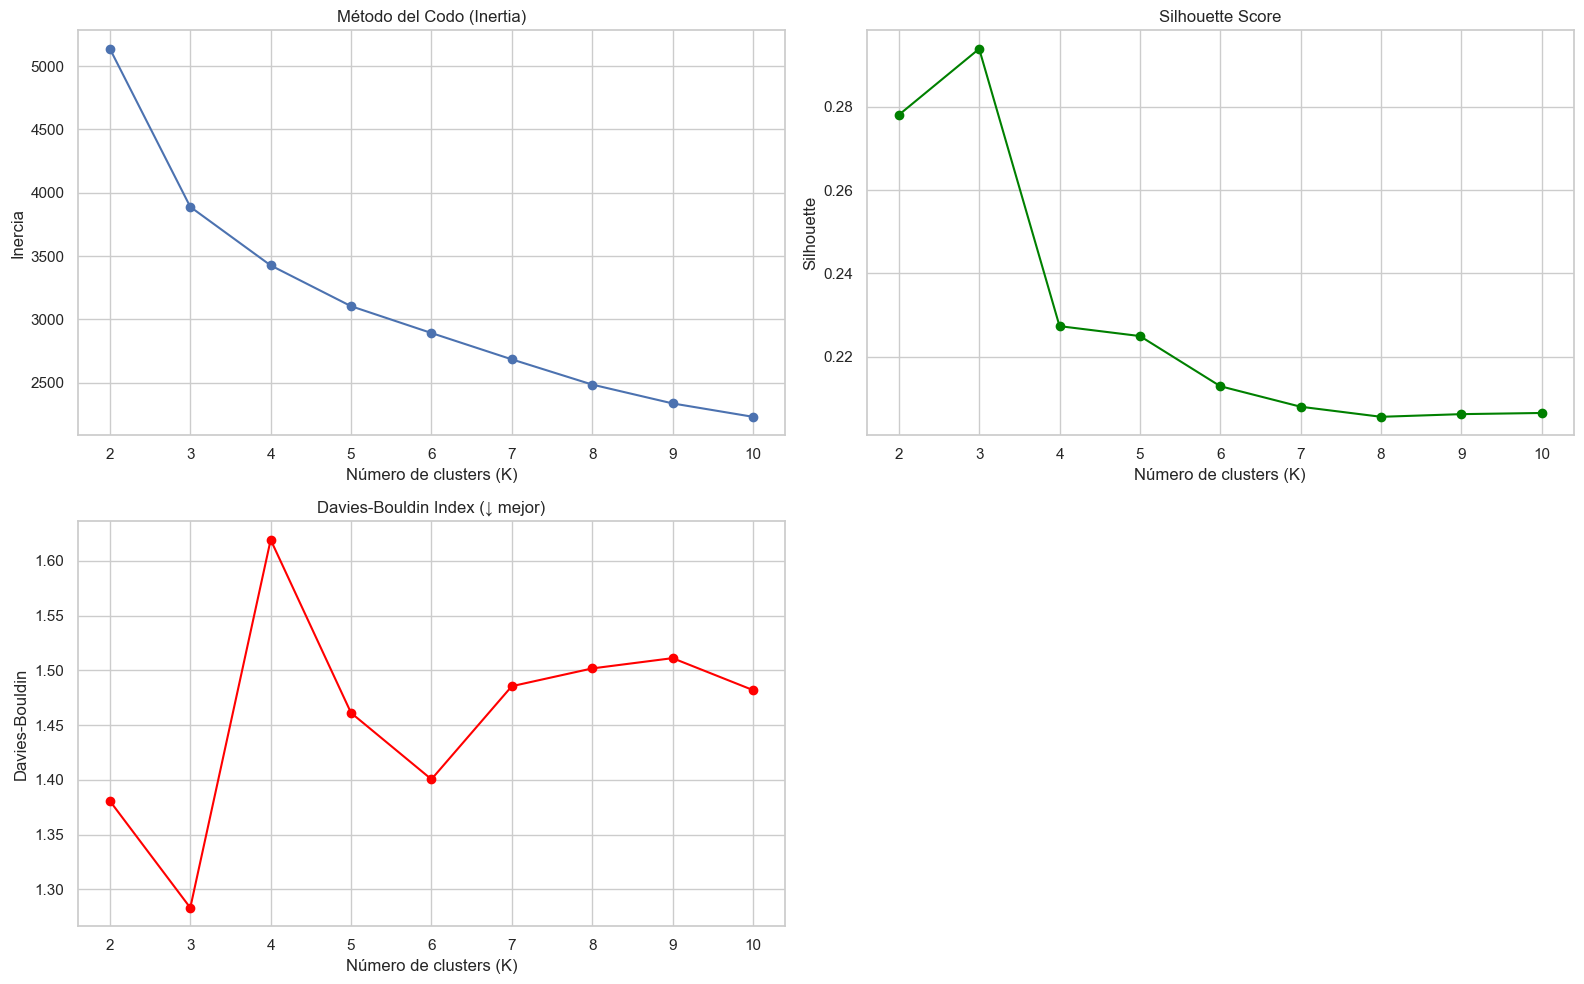

In [84]:
# 5. Evaluar métricas para distintos valores de K
K_range = range(2, 11)
inertias = []
silhouettes = []
davies = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))
    davies.append(davies_bouldin_score(X_scaled, labels))

# 6. Visualizar resultados
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.plot(K_range, inertias, marker='o')
plt.title("Método del Codo (Inertia)")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")

plt.subplot(2, 2, 2)
plt.plot(K_range, silhouettes, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Silhouette")

plt.subplot(2, 2, 3)
plt.plot(K_range, davies, marker='o', color='red')
plt.title("Davies-Bouldin Index (↓ mejor)")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Davies-Bouldin")

plt.tight_layout()
plt.show()

### Paso 5. Aplicamos K-Means con el valor de K=4 obtenido de las graficas

In [85]:
# Aplicamos KMeans con K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Asignar etiquetas de cluster al dataset
dataset['cluster'] = kmeans.labels_

##### _Pasos 4 y 5 Elección del número óptimo de clusters (K=4)_
Para determinar el número óptimo de clusters, se evaluaron varios criterios métricos de validación interna del modelo de KMeans:

1. __Método del Codo (Inercia):__
Se observa un punto de inflexión claro en K=4, donde la disminución de la inercia comienza a desacelerarse notablemente. A partir de ese valor, los beneficios adicionales en compactación de los clusters son menos significativos. Este “codo” sugiere que K=4 es un punto razonable de equilibrio entre simplicidad y capacidad explicativa del modelo.

2. __Silhouette Score:__
El valor más alto del coeficiente de Silhouette se alcanza en K=3, pero K=4 mantiene un valor aceptable y competitivo. La métrica comienza a decaer a partir de K=5, lo cual indica que un mayor número de clusters puede estar generando solapamiento entre grupos o estructuras menos definidas.

3. __Davies-Bouldin Index:__
Esta métrica penaliza los clusters que se solapan o que no están bien separados. El valor mínimo se observa en K=3, seguido de un valor bajo en K=4, mientras que a partir de K=5 se incrementa. Esto refuerza que valores mayores a 4 no aportan una segmentación significativamente mejor.

Dado que __K=4__ representa el mejor compromiso entre compacidad (Silhouette), separación (Davies-Bouldin) y simplicidad (Codo), se selecciona este valor como número óptimo de clusters para aplicar KMeans. Esta elección proporciona una segmentación interpretable, equilibrada y representativa de la estructura natural del conjunto de datos.

### Paso 6. Los centroides representan el perfil promedio de cada cluster. Son vectores con la media de cada variable física para los puntos de ese cluster.

In [86]:
# 6. Obtener los centroides (puntos medios) de cada cluster
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("\n #6. Centroides de los clusters:")
print(centroids)


 #6. Centroides de los clusters:
         Age  Weight (kg)  Height (m)        BMI  Fat_Percentage  \
0  26.168724    60.470782    1.671523  21.865062       26.876132   
1  36.604317   113.860432    1.796619  35.719496       24.936691   
2  47.918301    57.745425    1.689346  20.520523       26.533660   
3  40.452632    83.050877    1.765684  26.954386       21.705263   

   Experience_Level  Workout_Frequency (days/week)  
0          1.740741                       3.251029  
1          1.482014                       2.928058  
2          1.754902                       3.271242  
3          2.087719                       3.628070  


In [87]:
for i, row in centroids.iterrows():
 print(f"\nPerfil del Cluster {i}:")
 print(f"\nEdad promedio: {row['Age']:.1f} años")
 print(f"Peso promedio: {row['Weight (kg)']:.1f} kg")
 print(f"Altura promedio: {row['Height (m)']:.2f} m")
 print(f"IMC promedio: {row['BMI']:.1f}")
 print(f"Porcentaje de grasa corporal promedio: {row['Fat_Percentage']:.1f}%")
 print(f"Nivel de experiencia promedio: {row['Experience_Level']:.1f}")
 print(f"Frecuencia de entrenamiento promedio: {row['Workout_Frequency (days/week)']:.1f} días por semana")
 print("----------------------------------------------------------------------------------")


Perfil del Cluster 0:

Edad promedio: 26.2 años
Peso promedio: 60.5 kg
Altura promedio: 1.67 m
IMC promedio: 21.9
Porcentaje de grasa corporal promedio: 26.9%
Nivel de experiencia promedio: 1.7
Frecuencia de entrenamiento promedio: 3.3 días por semana
----------------------------------------------------------------------------------

Perfil del Cluster 1:

Edad promedio: 36.6 años
Peso promedio: 113.9 kg
Altura promedio: 1.80 m
IMC promedio: 35.7
Porcentaje de grasa corporal promedio: 24.9%
Nivel de experiencia promedio: 1.5
Frecuencia de entrenamiento promedio: 2.9 días por semana
----------------------------------------------------------------------------------

Perfil del Cluster 2:

Edad promedio: 47.9 años
Peso promedio: 57.7 kg
Altura promedio: 1.69 m
IMC promedio: 20.5
Porcentaje de grasa corporal promedio: 26.5%
Nivel de experiencia promedio: 1.8
Frecuencia de entrenamiento promedio: 3.3 días por semana
--------------------------------------------------------------------------

#### 🔵 Cluster 0 — “Usuarios jóvenes y principiantes”
* Edad promedio: 26.2 años

* Peso / Altura / IMC: 60.5 kg, 1.67 m, IMC de 21.9 (saludable)

* Grasa corporal: 26.9% (ligeramente elevada para su IMC)

* Experiencia: 1.7 (baja)

* Frecuencia de entrenamiento: 3.3 días/semana

* Ejercicio más frecuente: fuerza y cardio

* _Interpretación:
Personas jóvenes, posiblemente principiantes, con buen IMC pero grasa corporal algo alta — lo que sugiere poca masa muscular. Buen punto de partida para planes de tonificación y desarrollo muscular. En predicción de calorías, este grupo puede quemar moderadamente, pero no es el más activo._

#### 🔴 Cluster 1 — “Usuarios con obesidad y baja actividad”
* Edad promedio: 36.6 años

* Peso / Altura / IMC: 113.9 kg, 1.80 m, IMC de 35.7 (obesidad)

* Grasa corporal: 24.9%

* Experiencia: 1.5 (la más baja)

* Frecuencia de entrenamiento: 2.9 días/semana (la más baja)

* Ejercicio más frecuente: cardio

* _Interpretación:
Este grupo tiene el perfil más preocupante en términos de salud: sobrepeso severo, baja experiencia y poca frecuencia de entrenamiento. Por su masa corporal, probablemente tienen un gasto calórico alto en sesiones, pero muy limitado por su bajo rendimiento físico. Ideal para intervenciones progresivas y controladas._

#### 🟣 Cluster 2 — “Usuarios mayores y delgados”
* Edad promedio: 47.9 años

* Peso / Altura / IMC: 57.7 kg, 1.69 m, IMC de 20.5 (bajo)

* Grasa corporal: 26.5% (alta para su IMC)

* Experiencia: 1.75

* Frecuencia de entrenamiento: 3.3 días/semana

* Ejercicio más frecuente: yoga y fuerza

* _Interpretación:
Usuarios mayores, de bajo peso, pero con grasa corporal alta: esto es típico de baja masa muscular. Aunque entrenan con cierta frecuencia, su perfil es físicamente frágil. Su quema calórica puede ser baja, debido a poca masa muscular y metabolismo más lento. Necesitan enfoque en fuerza funcional._

#### 🟢 Cluster 3 — “Usuarios entrenados y constantes”
* Edad promedio: 40.5 años

* Peso / Altura / IMC: 83.1 kg, 1.77 m, IMC de 27.0 (ligero sobrepeso)

* Grasa corporal: 21.7% (la más baja)

* Experiencia: 2.1 (la más alta)

* Frecuencia de entrenamiento: 3.6 días/semana (la más alta)

* Ejercicio más frecuente: combinan cardio, fuerza y yoga

* _Interpretación:
Este grupo es físicamente el más competente: entrenan más, tienen experiencia y el porcentaje graso más bajo. Aunque tienen algo de sobrepeso, probablemente se deba a mayor masa muscular. En un modelo de predicción de calorías, este cluster puede asociarse con altas calorías quemadas por la intensidad y frecuencia de ejercicio._

#### __Conclusión para predicción:__
Cuando uses los clusters como variable en tu modelo de regresión para predecir Calories_Burned, podrías esperar este orden aproximado de calorías quemadas (de menor a mayor):

1. Cluster 2 (mayores delgados)

2. Cluster 0 (jóvenes con poca masa muscular)

3. Cluster 1 (obesidad, pero baja frecuencia)

4. Cluster 3 (activos, entrenados, buena composición)

### Paso 7. Saber cuántas sesiones hay en cada cluster nos da una idea del tamaño relativo de cada grupo.


 #7. Cantidad de sesiones por cluster:
cluster
2    306
3    285
0    243
1    139
Name: count, dtype: int64


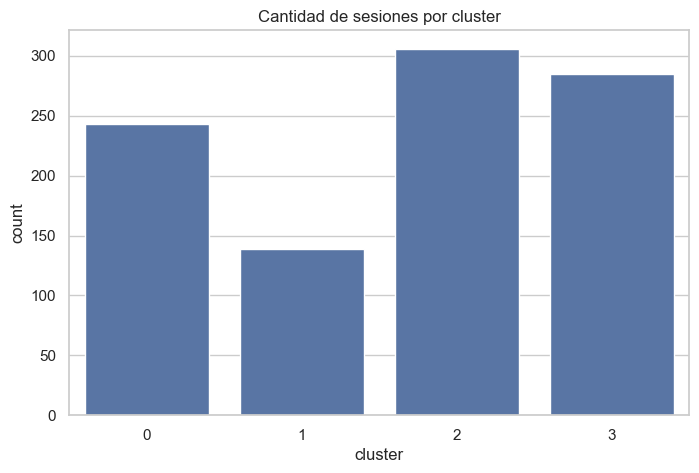

In [88]:
# 7. Ver cuántas sesiones hay en cada cluster
print("\n #7. Cantidad de sesiones por cluster:")
print(dataset['cluster'].value_counts())

# Gráfico de barras para cantidad de sesiones por cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', data=dataset)
plt.title('Cantidad de sesiones por cluster')
plt.show()

### Paso 8. Visualización mediante Reducción de Dimensionalidad para ver cómo se agrupan visualmente los clusters

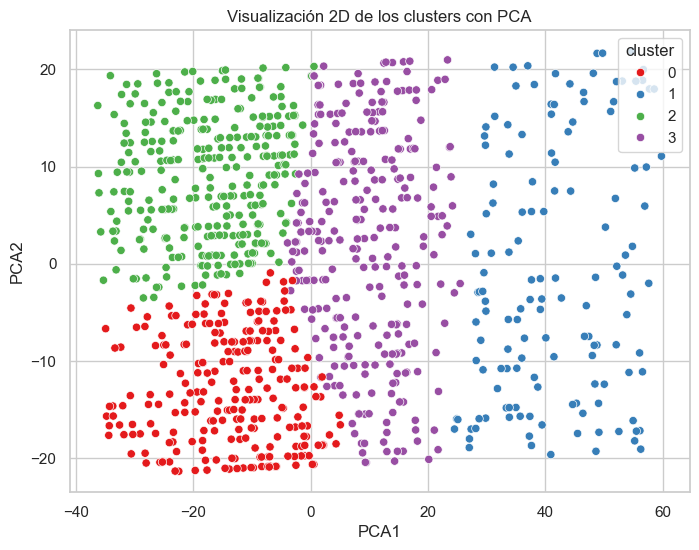

In [89]:
# Visualización tipo PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

df_plot = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_plot['cluster'] = dataset['cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_plot, palette='Set1')
plt.title('Visualización 2D de los clusters con PCA')
plt.show()

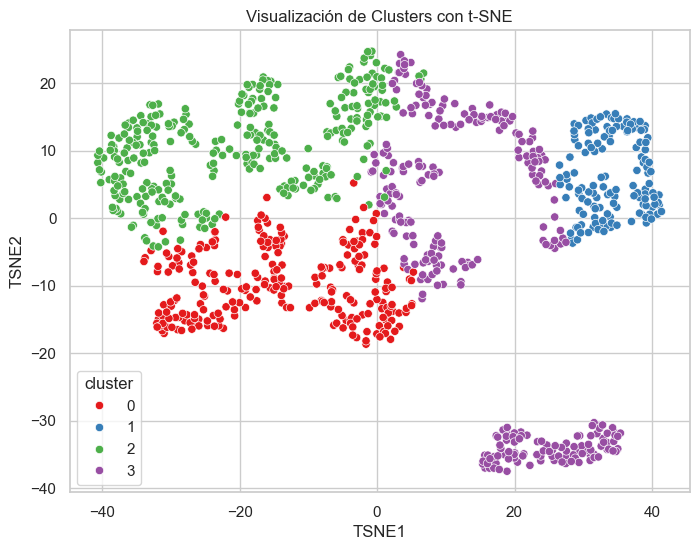

In [90]:
# Visualización tipo t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(X)

df_tsne = pd.DataFrame(tsne_components, columns=['TSNE1', 'TSNE2'])
df_tsne['cluster'] = dataset['cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', data=df_tsne, palette='Set1')
plt.title('Visualización de Clusters con t-SNE')
plt.show()

Con el objetivo de evaluar visualmente la distribución y la cohesión de los clusters generados por el algoritmo KMeans, se aplicaron dos técnicas de reducción de dimensionalidad: PCA (Análisis de Componentes Principales) y t-SNE (t-distributed Stochastic Neighbor Embedding).

La visualización mediante PCA mostró una separación razonablemente clara entre los diferentes grupos, lo que permite una interpretación más directa del reparto de los datos en un espacio bidimensional. Dado que PCA conserva la varianza lineal de los datos, es una herramienta útil para identificar agrupaciones generales de forma más ordenada y explicativa.

Por otro lado, la visualización mediante t-SNE reveló una estructura más compleja, con clusters más compactos y mejor definidos, aunque con formas menos intuitivas. Esta técnica es especialmente adecuada para detectar relaciones no lineales y capturar estructuras locales dentro de los datos, lo cual refuerza la validez de los grupos encontrados.

Conclusión:
Ambas representaciones confirman la coherencia del modelo con K = 5 clusters. Mientras que PCA es más adecuada para la interpretación general, t-SNE refuerza la solidez de la agrupación desde una perspectiva más detallada.

### Paso 9. Frecuencia de cada tipo de ejercicio por cluster


In [91]:
# Ver frecuencia de cada tipo de ejercicio por cluster
for tipo in ['Workout_HIIT', 'Workout_Strength', 'Workout_Yoga', 'Workout_Cardio']:
    print(f'\nFrecuencia media de {tipo} por cluster:')
    print(dataset.groupby('cluster')[tipo].mean())


Frecuencia media de Workout_HIIT por cluster:
cluster
0    0.193416
1    0.237410
2    0.248366
3    0.228070
Name: Workout_HIIT, dtype: float64

Frecuencia media de Workout_Strength por cluster:
cluster
0    0.292181
1    0.215827
2    0.287582
3    0.242105
Name: Workout_Strength, dtype: float64

Frecuencia media de Workout_Yoga por cluster:
cluster
0    0.230453
1    0.237410
2    0.241830
3    0.266667
Name: Workout_Yoga, dtype: float64

Frecuencia media de Workout_Cardio por cluster:
cluster
0    0.283951
1    0.309353
2    0.222222
3    0.263158
Name: Workout_Cardio, dtype: float64


## Paso 10. Interpretación de Clusters

### 🔵 Cluster 0 – Usuarios intermedios y constantes

Este grupo está compuesto por personas de edad media-alta (49,6 años de promedio), con una ligera mayoría masculina (58,3%). Presentan un peso y una altura medios (77,9 kg y 1,73 m), con un IMC de 26,4, que indica una ligera tendencia al sobrepeso. Su porcentaje de grasa corporal (24,6%) también se sitúa en un rango medio.

En cuanto al comportamiento, destacan por tener una frecuencia de entrenamiento constante (3,4 días/semana) y un nivel de experiencia relativamente bajo (1,86). A pesar de no ser los más experimentados, su compromiso con la actividad física es consistente.

📌 Interpretación: Usuarios maduros, físicamente equilibrados, que entrenan con regularidad. Podrían beneficiarse de programas que mejoren su composición corporal, especialmente si el objetivo es reducir grasa o mejorar el IMC.

### 🟠 Cluster 1 – Usuarios jóvenes y principiantes

Formado por individuos jóvenes (26,3 años de media), este grupo cuenta con una mayoría femenina (solo un 21,6% son hombres). Son los más ligeros del conjunto, con un peso promedio de 60 kg y una altura de 1,67 m, lo que da lugar a un IMC de 21,8, dentro del rango saludable.

Tienen un porcentaje de grasa corporal algo más elevado de lo esperado (26,8%), lo que podría estar relacionado con su escaso nivel de experiencia (1,74) y una frecuencia de entrenamiento ligeramente inferior a la media (3,2 días/semana).

📌 Interpretación: Usuarios novatos, jóvenes y de constitución delgada, pero con margen de mejora a nivel de composición corporal. Representan un grupo ideal para planes de iniciación y educación deportiva.

### 🔴 Cluster 2 – Usuarios con sobrepeso y perfil masculino

Este grupo presenta un perfil físico muy marcado: edad media (37,8 años), 100% hombres, con un peso elevado (114,6 kg), una altura superior al resto (1,80 m) y un IMC de 36,0, que los sitúa claramente en la categoría de obesidad.

El porcentaje de grasa corporal (25%) no es el más alto, pero junto con su bajo nivel de experiencia (1,49) y su frecuencia de entrenamiento reducida (2,9 días/semana), indican un estilo de vida más sedentario o menos disciplinado.

📌 Interpretación: Usuarios con obesidad y escasa experiencia. Este grupo requiere intervenciones orientadas a la pérdida de peso, acompañadas de programas adaptados de entrenamiento progresivo.

### 🟣 Cluster 3 – Usuarios mayores y delgados

Compuesto por personas de edad elevada (46,8 años de media) y mayoría femenina (solo 32,8% hombres), este cluster tiene el menor peso (54,8 kg) y uno de los IMC más bajos (19,3), cerca del umbral de delgadez. Sin embargo, el porcentaje de grasa corporal (26,3%) es moderadamente alto, lo que sugiere una baja masa muscular.

Presentan un nivel de experiencia aceptable (1,79) y entrenan con frecuencia media (3,3 días/semana), lo cual sugiere un cierto hábito, pero sin progresión evidente.

📌 Interpretación: Personas mayores y físicamente frágiles, con composición corporal poco favorable a pesar de su bajo peso. Requieren entrenamiento orientado a ganancia muscular y mejora de fuerza funcional.

### 🟢 Cluster 4 – Usuarios avanzados y en forma

Este grupo está formado por usuarios jóvenes (29 años), con una mayoría masculina (82,4%). Tienen un peso medio-alto (85,1 kg) y una altura elevada (1,78 m), con un IMC de 27,1, que podría indicar sobrepeso, pero que se compensa con el porcentaje de grasa más bajo del conjunto (20,5%).

Son los más experimentados (2,16 de media) y los que entrenan con mayor frecuencia (3,7 días/semana), lo cual refleja una alta implicación con la actividad física.

📌 Interpretación: Usuarios avanzados, con buena condición física y hábitos sólidos. Representan un grupo modelo de adherencia y disciplina, que probablemente sigue una rutina estructurada y orientada al rendimiento.



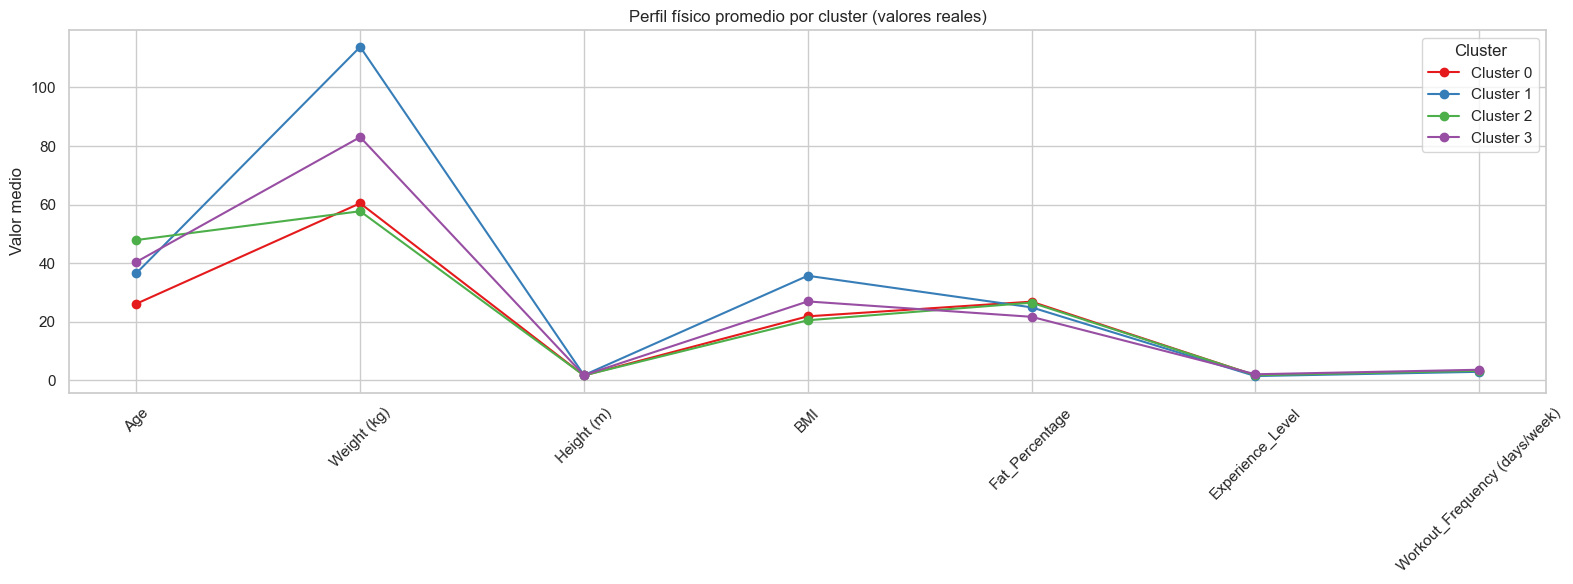

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculamos los centroides reales (no escalados)
centroids_real = dataset.groupby('cluster')[features].mean().T  # Transponemos para tener atributos en X

# Representación gráfica
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("Set1", n_colors=centroids_real.shape[1])

for i, col in enumerate(centroids_real.columns):
    plt.plot(centroids_real.index, centroids_real[col], marker='o', label=f'Cluster {col}', color=palette[i])

plt.title("Perfil físico promedio por cluster (valores reales)")
plt.ylabel("Valor medio")
plt.xticks(rotation=45)
plt.legend(title="Cluster", loc="upper right")
plt.tight_layout()
plt.show()

### Centroides Escalados

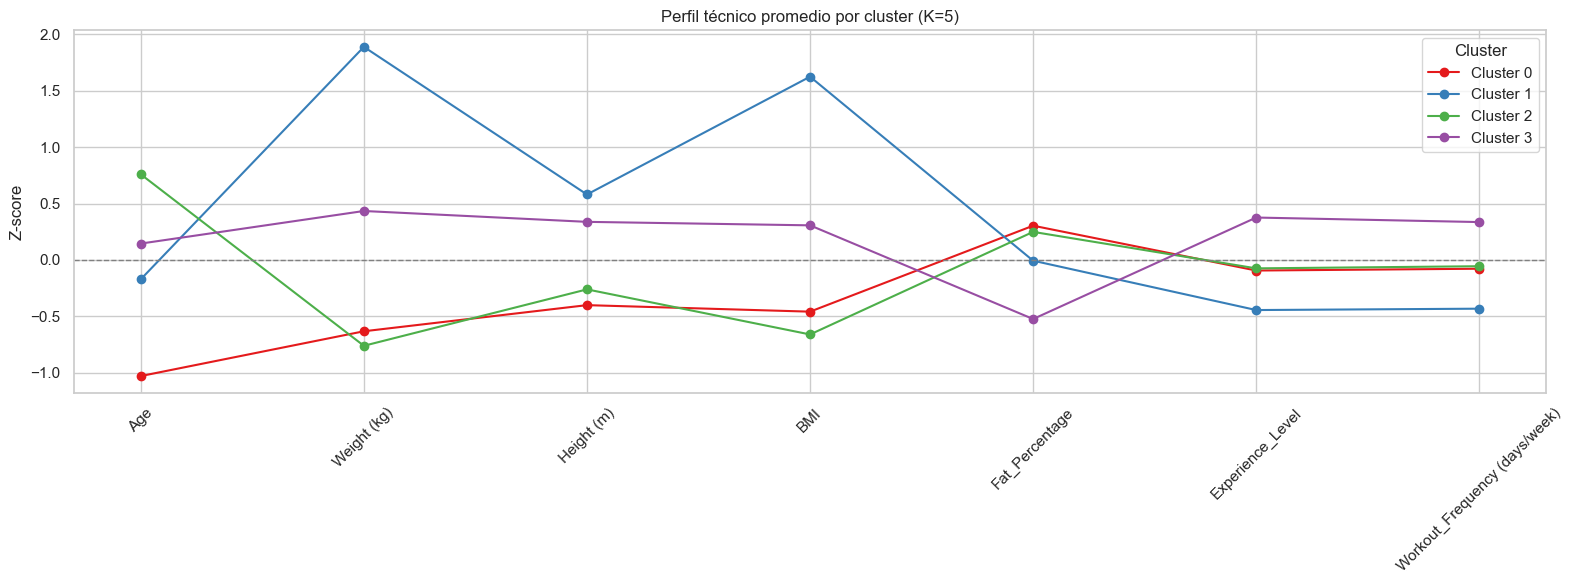


Centroides Z-score por cluster:
cluster                           0     1     2     3
Age                           -1.03 -0.17  0.76  0.15
Weight (kg)                   -0.63  1.89 -0.76  0.43
Height (m)                    -0.40  0.58 -0.26  0.34
BMI                           -0.46  1.62 -0.66  0.31
Fat_Percentage                 0.30 -0.01  0.25 -0.52
Experience_Level              -0.09 -0.44 -0.07  0.38
Workout_Frequency (days/week) -0.08 -0.43 -0.06  0.34


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Añadir cluster a los datos escalados
df_scaled = pd.DataFrame(X_scaled, columns=features)
df_scaled['cluster'] = dataset['cluster']

# Calcular la media estandarizada (Z-score) de cada atributo por cluster
centroids_z = df_scaled.groupby('cluster').mean().T

# Representación gráfica estilo perfil técnico (líneas con marcadores)
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("Set1", n_colors=centroids_z.shape[1])

for i, col in enumerate(centroids_z.columns):
    plt.plot(centroids_z.index, centroids_z[col], marker='o', label=f'Cluster {col}', color=palette[i])

plt.title("Perfil técnico promedio por cluster (K=5)")
plt.ylabel("Z-score")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title="Cluster", loc="upper right")
plt.tight_layout()
plt.show()

centroids_table = df_scaled.groupby('cluster').mean().T.round(2)
print("\nCentroides Z-score por cluster:")
print(centroids_table)

#### Generamos un nuevo dataset para añadir al que ya teniamos una nueva columna Cluster. Cada sesion de entrenamiento tendrá asignado el Cluster al que representa

In [94]:
dataset['cluster'] = kmeans.fit_predict(X_scaled)
dataset.to_csv("dataset_con_clusters.csv", index=False)

In [95]:
import joblib

# Guardar el scaler y el modelo KMeans
joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "kmeans.pkl")

['kmeans.pkl']